## SMART TANKS
### Coupled tanks simulator based on machine learning

#### 1. Required functions

In [3]:
### FUNCTIONS

#function to scale the dataset
def scaleData(data):
    s_data = data.copy()
    l = len(s_data.T)
    for i in range(l):
        s_data.iloc[:,i] = ((data.iloc[:,i] - data.iloc[:,i].min())
                          / (data.iloc[:,i].max() - data.iloc[:,i].min()))
    return s_data

#function to standardize the dataset
def standardizeData(data):
    s_data = data.copy()
    l = len(s_data.T)
    for i in range(l):
        s_data.iloc[:,i] = ((data.iloc[:,i] - data.iloc[:,i].mean())
                          / data.iloc[:,i].std())
    
    return s_data

#function to reStand data
def reStandData(data,y,n_inputs,n_outputs):
    s_y = y.copy()
    outs = data.iloc[:,n_inputs:n_inputs+n_outputs]
    y_m = np.matrix(y)
    l = len(outs.T)
    for i in range(l):
        s_y = y_m[i,:] * outs.iloc[:,i].std() + outs.iloc[:,i].mean()
        
    
    return np.array(s_y)

#function to add previous values as features
def addFeatures(data, n, names):
    l = len(data.T)
    for i in range(l):
        for j in range(n):
            #names for delayed inputs
            #Ex: Input Gas Rate (-1)...
            txt = names[i]+' (-'+str(j+1)+')'
            if j == 0:
                data[txt] = data[names[i]].shift(periods=1)
            else:
                txt2 = names[i]+' (-'+str(j)+')'
                data[txt] = data[txt2].shift(periods=1)
            
            data.loc[0,txt] = data.loc[1,txt]
            
        
    
    return data


#split data into X and y
def getPairs(fData, n_inputs, n_outputs):
    x = fData.iloc[:,0:n_inputs]
    delayed_x = fData.iloc[:,n_inputs+n_outputs:]
    X = pd.concat([x,delayed_x], axis=1)
    y = fData.iloc[:,n_inputs:n_inputs+n_outputs]
    return X,y



from sklearn.model_selection import train_test_split

#getting (shuffled) train and test sets 
def getTrainTest(X,Y,samples_train=0.85, shuffle=0):
    if(shuffle):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1-samples_train,random_state=1)
        return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)
    else:
        train_size = int(len(X) * samples_train)
        test_size = len(X) - train_size
        X_train, X_test = X.iloc[0:train_size],X.iloc[train_size:train_size+test_size]
        y_train, y_test = Y.iloc[0:train_size],Y.iloc[train_size:train_size+test_size]
        return X_train, X_test, y_train, y_test
    
def getTrainTestNoDF(X,Y,samples_train=0.85):
    train_size = int(len(X) * samples_train)
    test_size = len(X) - train_size
    X_train, X_test = X[0:train_size],X[train_size:train_size+test_size]
    y_train, y_test = Y[0:train_size],Y[train_size:train_size+test_size]
    return X_train, X_test, y_train, y_test

        
def plotOuts(y_pred, y_test, title):
    l = len(y_pred.T)
    for i in range(l):
        plt.figure(i)
        plt.plot(y_pred[:,i])
        plt.plot(y_test[:,i])
        plt.xlabel('Sample');


def getLearningCurve(history):
    plt.figure()
    plt.plot(history['loss'], label='train')
    plt.plot(history['val_loss'], label='test')
    plt.xlabel("epochs")
    plt.legend()
    plt.show()

import pickle

def saveHistoryTrain(folder,name,emq,history,verbose=0):
    with open('models/'+str(folder)+'/histories/'+str(name)+'_'+str(emq), 'wb') as file_pi:
        pickle.dump(history, file_pi)
    if(verbose):    
        print("Histórico de trainamento salvo")
        
        
def loadHistoryTrain():
    history = pickle.load(open('models/histories/ST_'+str(best_ss['emq']), "rb"))
    return history

#### 2. Data preprocessing

,L2,V
0,0.511169,-0.989822
1,0.509262,-0.989822
2,0.509262,-0.989822


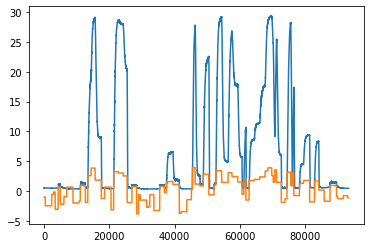

In [37]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
mat = scipy.io.loadmat('dados/dados.mat')
mat1 = scipy.io.loadmat('dados/dados_all.mat')
mat2 = scipy.io.loadmat('dados/resultados2.mat')

L2 = mat1.get('DadosAll')[:,1]
V = mat1.get('DadosAll')[:,2]

plt.plot(L2)
plt.plot(V)
d = {'L2': L2, 'V': V}
tankdata = pd.DataFrame(data=d)
tankdata.to_csv('tankdata.csv',index=False)
tankdata.head(3)

In [16]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Nov 30 18:02:08 2018',
 '__version__': '1.0',
 '__globals__': [],
 'V': array([[-0.98982232],
        [-0.98982232],
        [-0.98982232],
        ...,
        [-1.12091054],
        [-1.12091054],
        [-1.12091054]]),
 'L2': array([[0.51116943],
        [0.50926208],
        [0.50926208],
        ...,
        [0.46730042],
        [0.46730042],
        [0.46730042]])}

In [17]:
mat1

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Nov 30 17:51:15 2018',
 '__version__': '1.0',
 '__globals__': [],
 'DadosAll': array([[ 0.00000000e+00,  5.11169434e-01, -9.89822318e-01],
        [ 1.00000000e-01,  5.09262085e-01, -9.89822318e-01],
        [ 2.00000000e-01,  5.09262085e-01, -9.89822318e-01],
        ...,
        [ 4.78980000e+03,  4.67300415e-01, -1.12091054e+00],
        [ 4.78990000e+03,  4.67300415e-01, -1.12091054e+00],
        [ 4.79000000e+03,  4.67300415e-01, -1.12091054e+00]])}

In [27]:
mat2

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Nov 23 13:03:11 2018',
 '__version__': '1.0',
 '__globals__': [],
 'DadoScope': array([[ 1.30000000e-01, -1.73568726e-01,  1.07745361e+00],
        [ 1.40000000e-01, -1.75476074e-01,  1.07745361e+00],
        [ 1.50000000e-01, -1.73568726e-01,  1.07745361e+00],
        ...,
        [ 5.99991000e+03,  2.54421234e+01,  3.01074805e+00],
        [ 5.99992000e+03,  2.54440308e+01,  3.01074805e+00],
        [ 5.99993000e+03,  2.54402161e+01,  3.01074805e+00]])}

In [29]:
V

array([0.51116943, 0.50926208, 0.50926208, ..., 0.46730042, 0.46730042,
       0.46730042])

In [32]:
V

array([-0.98982232, -0.98982232, -0.98982232, ..., -1.12091054,
       -1.12091054, -1.12091054])